This data was extracted from the census bureau database found at

http://www.census.gov/ftp/pub/DES/www/welcome.html

Donor: Ronny Kohavi and Barry Becker, Data Mining and
Visualization
Silicon Graphics.
e-mail: ronnyk@sgi.com for questions.

In [71]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
import warnings
warnings.filterwarnings('ignore')

In [73]:
#loading data
url='https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']
data=pd.read_csv(url,names=columns)
data.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [74]:
data.shape

(32561, 15)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## feature engineering

In [76]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [77]:
#there are some places where ? presents.Let us check it.
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [78]:
data.replace(' ?',np.nan,inplace=True)
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

### salary

In [79]:
#categorise salary
data['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [80]:
data['salary']=data['salary'].replace({' <=50K':0,' >50K':1})
data['salary'].unique()

array([0, 1], dtype=int64)

In [81]:
data['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

<AxesSubplot:xlabel='salary', ylabel='count'>

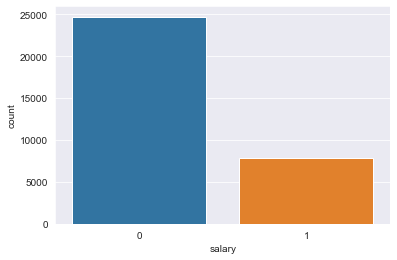

In [82]:
sns.set_style(style = 'darkgrid')
sns.countplot(data['salary'])

## age

In [83]:
data['age'].isna().sum()

0

<AxesSubplot:xlabel='age', ylabel='Density'>

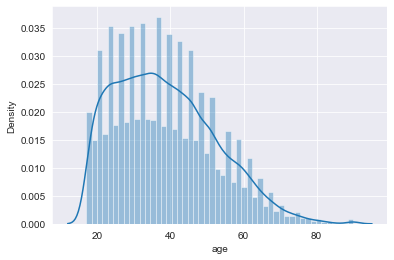

In [84]:
sns.distplot(data['age'])

In [85]:
data['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

## workclass

In [86]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [87]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [88]:
#Combine without pay and never worked and also replace nan with other group
data['workclass'].replace(' Without-pay',' Never-worked',inplace=True) 
data['workclass'].fillna(' other',inplace=True)
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' other', ' Self-emp-inc', ' Never-worked'],
      dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' State-gov'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Private'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' other'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Never-worked')])

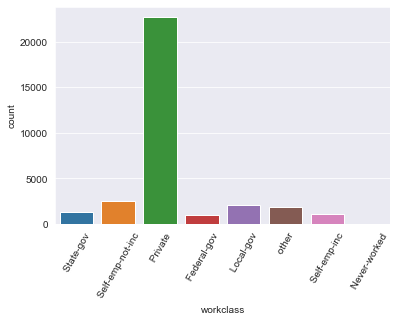

In [89]:
sns.countplot(data['workclass'])
plt.xticks(rotation=60)

## fnlwgt

<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

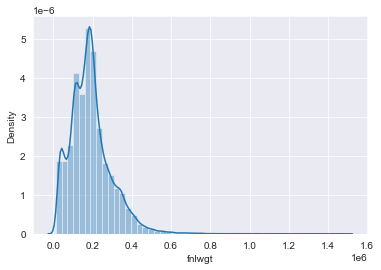

In [90]:
sns.distplot(data['fnlwgt'])

In [91]:
data['fnlwgt']=np.log(data['fnlwgt'])

<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

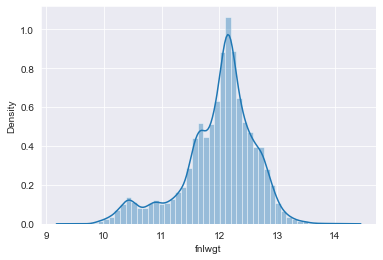

In [92]:
sns.distplot(data['fnlwgt'])

## education

In [93]:
data['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

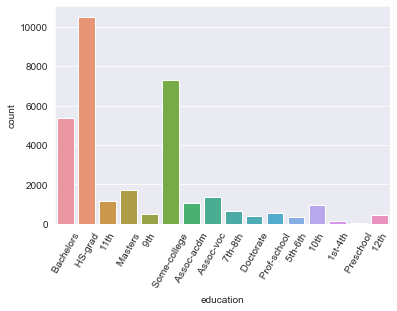

In [94]:
sns.countplot(data['education']);
plt.xticks(rotation=60);

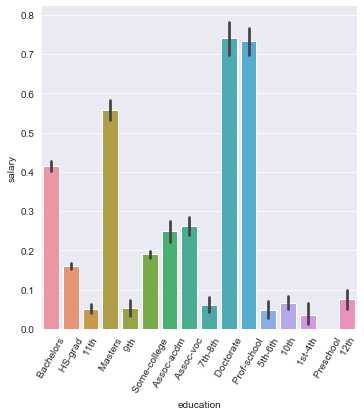

In [95]:
sns.catplot('education','salary',data=data,kind='bar');
plt.xticks(rotation=60);

In [96]:
def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return 'Primary'
    else:
        return x

In [97]:
data['education']=data['education'].apply(primary)

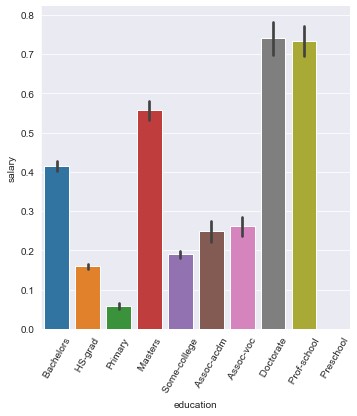

In [98]:
sns.catplot('education','salary',data=data,kind='bar');
plt.xticks(rotation=60);

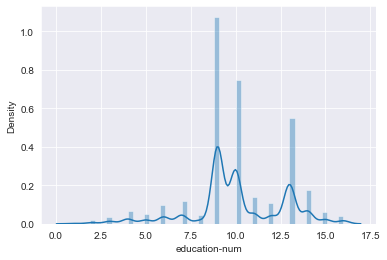

In [99]:
sns.distplot(data['education-num']);

## marital status

In [100]:
data['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [101]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

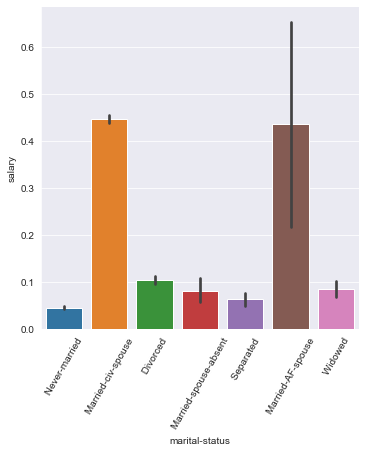

In [102]:
sns.catplot(x='marital-status',y='salary',data=data,kind='bar');
plt.xticks(rotation=60);

## occupation

In [103]:
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [104]:
data['occupation'].isna().sum()

1843

In [105]:
#replace nan wiith other group and combine armed forces into it
data['occupation'].replace(np.nan,'other',inplace=True)
data['occupation'].replace(' Armed-Forces','other',inplace=True)
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
other                 1852
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
Name: occupation, dtype: int64

## relationship

In [106]:
data['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

## race

In [107]:
data['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

## sex

<AxesSubplot:>

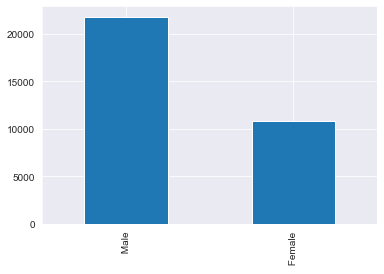

In [108]:
data['sex'].value_counts().plot.bar()

## native country

In [109]:
data['native-country'].isna().sum()

583

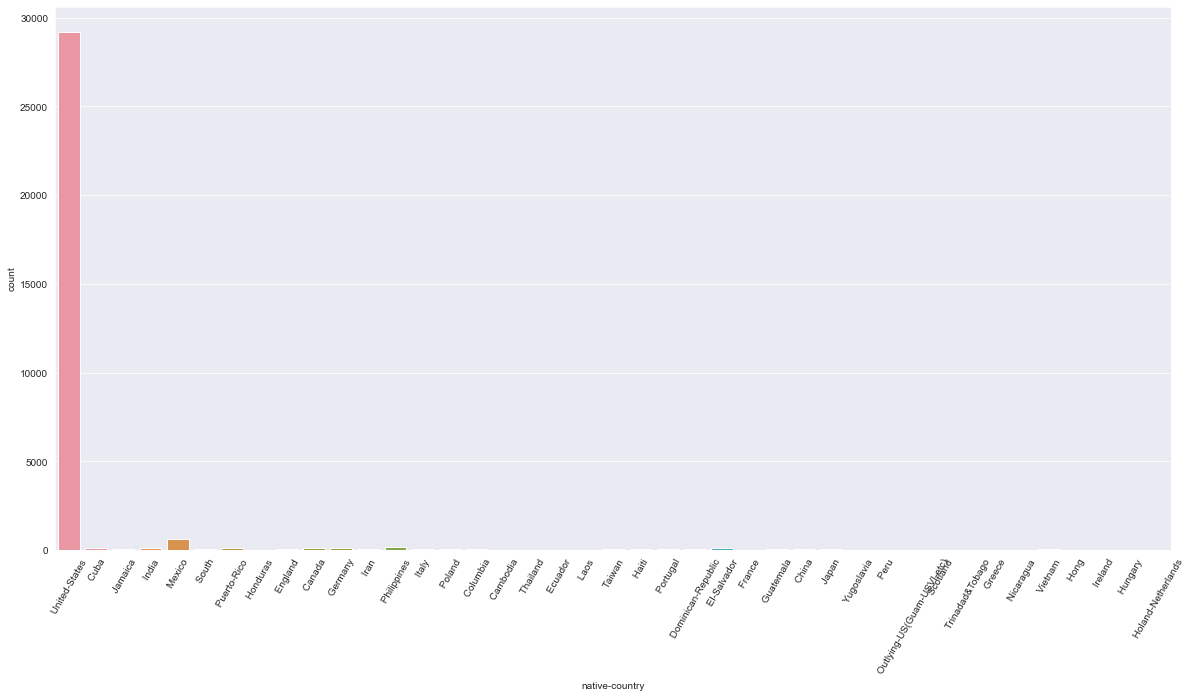

In [110]:
plt.figure(figsize=(20,10))
sns.countplot(data['native-country']);
plt.xticks(rotation=60);

In [111]:
#combining countries based on continent
def region(x):
  if x in [' Laos',' India',' China',' Japan',' Iran',' Thailand',' Hong',' Cambodia',' Laos',' Philippines',' Taiwan',' Vietnam']:
    return 'Asia'
  elif x in [' Mexico',' United-States',' Canada',' Cuba',' Jamaica',' Haiti',' Puerto-Rico',' El-Salvador',' Dominican-Republic',' Guatemala',' Nicaragua'
               ,' Trinadad&Tobago',' Outlying-US(Guam-USVI-etc)',' Honduras']:
    return 'North America'
  elif x in [' Columbia',' South',' Peru',' Ecuador',' ']:
    return 'South America'
  elif x in [' Germany',' England',' Italy',' Poland',' Portugal',' Greece',' Yugoslavia',' France',' Ireland',' Scotland',' Hungary',' Holand-Netherlands']:
    return 'Europe'

In [112]:
data['native-country']=data['native-country'].apply(region)

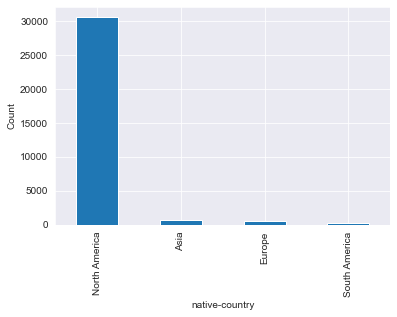

In [113]:
data['native-country'].value_counts().plot.bar();
plt.xlabel('native-country');
plt.ylabel('Count');

In [114]:
data['native-country'].isna().sum()

583

In [115]:
data['native-country'].replace(np.nan,'other',inplace=True)

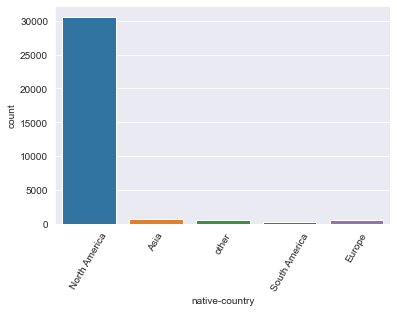

In [116]:
sns.countplot(data['native-country']);
plt.xticks(rotation=60);

In [117]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

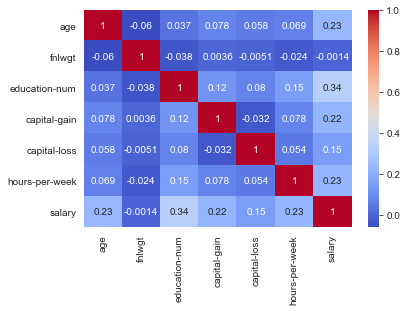

In [118]:
corr=data.corr()
sns.heatmap(data=corr,annot=True, cmap = 'coolwarm');

In [119]:
#fnlwgt has less values of corr.Hence we can drop it
data=data.drop(columns=['fnlwgt'],axis=1)


In [120]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North America,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,North America,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North America,0
3,53,Private,Primary,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,North America,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,North America,0


In [121]:
x=data.drop('salary',axis=1)
y=data['salary']

In [122]:
x1=pd.get_dummies(x,drop_first=True)

In [123]:
x1.head(1)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_Europe,native-country_North America,native-country_South America,native-country_other
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0


In [124]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=.2,random_state=0)

In [125]:
x_train.shape,x_test.shape

((26048, 54), (6513, 54))

## Logistic regression


In [126]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)


LogisticRegression()

In [127]:
from sklearn.metrics import accuracy_score
y_pred_train=model1.predict(x_train)
y_pred_test=model1.predict(x_test)

acc_1train=accuracy_score(y_train,y_pred_train)
acc_1test=accuracy_score(y_test,y_pred_test)

acc_1train,acc_1test




(0.8462070024570024, 0.8438507600184247)

In [128]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y_pred_test)
cm1

array([[4560,  358],
       [ 659,  936]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

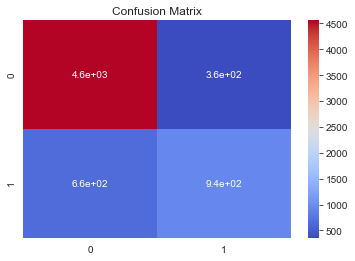

In [129]:
sns.heatmap(cm1, annot= True, cmap='coolwarm');
plt.title('Confusion Matrix')

# Decision tree

In [130]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [131]:
grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,2),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
}

In [132]:
#tuning
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(model2,param_grid=grid_dt,cv=5,verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=

[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=9, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=9, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=9, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf

[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=8, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=8, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=8, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=8, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=8, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=8, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=8, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=8, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_le

[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=8, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_

[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=6, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=6, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=6, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=6, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=6, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=7, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=7, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_

[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=6, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=6, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_

[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf

[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=3, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=3, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=3, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=4, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=4, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=4, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=4, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=4, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf

[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=8, min_samples_split=2, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=8, min_samples_split=2, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=8, min_samples_split=3, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=8, min_samples_split=3, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=8, min_samples_split=3, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=8, min_samples_split=3, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=8, min_samples_split=3, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=8, min_samples_split=3, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf

[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=2, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=2, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=2, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=2, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=2, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=2, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=2, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=2, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf

[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=9, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=9, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=9, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=9, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=9, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=9, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=9, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=9, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf

[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_le

[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_le

[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_le

[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_

[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_

[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=3, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_

[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_

[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=9, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=9, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=9, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=9, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=2, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=2, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=2, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=2, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_le

[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=8, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=8, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=9, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=9, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=9, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=9, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=9, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=9, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf

[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=7, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=8, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=8, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=8, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=8, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=8, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=8, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=8, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf

[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf

[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf

[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_le

[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_

[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=3, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=3, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=3, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=3, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=3, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_

[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=2, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=2, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=2, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=2, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=2, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=3, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=3, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=3, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_

[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=9, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=9, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=9, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=9, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=9, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_

[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=8, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=8, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=8, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=8, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=9, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=9, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=9, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=9, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_le

[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=7, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=7, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=7, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=7, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=8, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=8, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=8, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=8, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_le

[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=6, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=6, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=6, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=6, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=7, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=7, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=7, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=7, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_le

[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf

[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf

[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf

[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf

[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=2, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=2, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=2, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=2, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=2, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf

[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=9, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=9, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=9, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=9, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=9, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=9, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=9, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=9, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf

[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=6, min_samples_split=8, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=6, min_samples_split=8, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=6, min_samples_split=8, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=6, min_samples_split=8, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=6, min_samples_split=8, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=6, min_samples_split=8, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=6, min_samples_split=8, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=6, min_samples_split=8, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf

[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=7, min_samples_split=7, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=7, min_samples_split=7, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=7, min_samples_split=7, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=7, min_samples_split=7, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=7, min_samples_split=7, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=7, min_samples_split=7, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=7, min_samples_split=7, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=7, min_samples_split=7, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf

[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=8, min_samples_split=6, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=8, min_samples_split=6, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=8, min_samples_split=6, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=8, min_samples_split=6, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=8, min_samples_split=6, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=8, min_samples_split=6, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=8, min_samples_split=6, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=8, min_samples_split=6, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf

[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=9, min_samples_split=5, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=9, min_samples_split=5, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=9, min_samples_split=5, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=9, min_samples_split=5, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=9, min_samples_split=5, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=9, min_samples_split=5, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=9, min_samples_split=5, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=9, min_samples_split=5, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_le

[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min

[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min

[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min

[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=9, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=9, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=9, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=9, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=9, splitter=random; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=9, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=9, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=9, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min

[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=8, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=8, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=8, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min

[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_s

[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=6, splitter=best; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=6, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=6, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=6, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=6, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=6, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=6, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=6, min_samples_split=6, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_s

[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_s

[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=8, min_samples_split=4, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=8, min_samples_split=4, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=8, min_samples_split=4, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=8, min_samples_split=4, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=8, min_samples_split=4, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=8, min_samples_split=4, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=8, min_samples_split=4, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=8, min_samples_split=4, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_s

[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=9, min_samples_split=3, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=9, min_samples_split=3, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=9, min_samples_split=3, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=9, min_samples_split=3, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=9, min_samples_split=3, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=9, min_samples_split=3, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=9, min_samples_split=3, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=9, min_samples_split=3, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_s

[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, min_s

[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=9, splitter=random; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=9, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=9, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=9, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, min_s

[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=8, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=8, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=8, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=8, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=8, splitter=random; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=8, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=8, splitter=random; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=8, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, min_s

[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, min_sam

[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=6, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=6, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, min_sam

[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, min_sam

[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=6, min_samples_split=4, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, min_sam

[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=7, min_samples_split=3, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=7, min_samples_split=3, splitter=random; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, min_sam

[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=7, min_samples_split=9, splitter=random; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=7, min_samples_split=9, splitter=random; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=8, min_samples_split=2, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=8, min_samples_split=2, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=8, min_samples_split=2, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=8, min_samples_split=2, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=8, min_samples_split=2, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=8, min_samples_split=2, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, min_sam

[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=8, min_samples_split=8, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=8, min_samples_split=8, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=8, min_samples_split=9, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=8, min_samples_split=9, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=8, min_samples_split=9, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=8, min_samples_split=9, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=8, min_samples_split=9, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=8, min_samples_split=9, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, min_sam

[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=9, min_samples_split=7, splitter=random; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=9, min_samples_split=7, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=9, min_samples_split=8, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=9, min_samples_split=8, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=9, min_samples_split=8, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=9, min_samples_split=8, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=9, min_samples_split=8, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=9, min_samples_split=8, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, min_sam

[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, min_sam

[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, min_sam

[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, min_sam

[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=3, splitter=random; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=3, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=3, splitter=random; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=14, min_sam

[CV 2/5] END criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=14, min_s

[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=9, splitter=random; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=9, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=9, splitter=random; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=9, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=9, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=6, min_samples_split=2, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=14, min_samples_leaf=6, min_samples_split=2, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=6, min_samples_split=2, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=14, min

[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=6, min_samples_split=8, splitter=random; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=14, min_samples_leaf=6, min_samples_split=8, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=6, min_samples_split=8, splitter=random; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=6, min_samples_split=8, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, min_samples_leaf=6, min_samples_split=8, splitter=random; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=6, min_samples_split=9, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=14, min_samples_leaf=6, min_samples_split=9, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=6, min_samples_split=9, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=14, min

[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=7, min_samples_split=7, splitter=random; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=14, min_samples_leaf=7, min_samples_split=7, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=7, min_samples_split=7, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=7, min_samples_split=7, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, min_samples_leaf=7, min_samples_split=7, splitter=random; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=7, min_samples_split=8, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=14, min_samples_leaf=7, min_samples_split=8, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=7, min_samples_split=8, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=14, min

[CV 5/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=6, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=6, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=6, splitter=random; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=6, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=6, splitter=random; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=6, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=7, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=14, min_samples_leaf=8, min_samples_split=7, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=14, min

[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=9, min_samples_split=5, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=14, min_samples_leaf=9, min_samples_split=5, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=9, min_samples_split=5, splitter=random; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=14, min_samples_leaf=9, min_samples_split=5, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, min_samples_leaf=9, min_samples_split=5, splitter=random; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=14, min_samples_leaf=9, min_samples_split=5, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, min_samples_leaf=9, min_samples_split=5, splitter=random; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=14, min_samples_leaf=9, min_samples_split=6, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=14, min

[CV 4/5] END criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=16, min

[CV 3/5] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=16, min

[CV 3/5] END criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=16, min

[CV 2/5] END criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=9, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=9, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=9, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=9, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=9, splitter=random; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=9, splitter=random; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=9, splitter=random; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=9, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=16, min_s

[CV 1/5] END criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=8, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=8, splitter=best; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=8, splitter=best; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=8, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=8, splitter=best; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=16, min_sam

[CV 1/5] END criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=16, min_sam

[CV 1/5] END criterion=gini, max_depth=16, min_samples_leaf=6, min_samples_split=6, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=16, min_samples_leaf=6, min_samples_split=6, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=16, min_samples_leaf=6, min_samples_split=6, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=16, min_samples_leaf=6, min_samples_split=6, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=16, min_samples_leaf=6, min_samples_split=6, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=16, min_samples_leaf=6, min_samples_split=6, splitter=random; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=16, min_samples_leaf=6, min_samples_split=6, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=16, min_samples_leaf=6, min_samples_split=6, splitter=random; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=16, min_sam

[CV 1/5] END criterion=gini, max_depth=16, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=16, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=16, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=16, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=16, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=16, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=16, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=16, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=16, min_sam

[CV 5/5] END criterion=gini, max_depth=16, min_samples_leaf=8, min_samples_split=3, splitter=random; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=16, min_samples_leaf=8, min_samples_split=4, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=16, min_samples_leaf=8, min_samples_split=4, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=16, min_samples_leaf=8, min_samples_split=4, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=16, min_samples_leaf=8, min_samples_split=4, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=16, min_samples_leaf=8, min_samples_split=4, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=16, min_samples_leaf=8, min_samples_split=4, splitter=random; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=16, min_samples_leaf=8, min_samples_split=4, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=16, min_sam

[CV 5/5] END criterion=gini, max_depth=16, min_samples_leaf=9, min_samples_split=2, splitter=random; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=16, min_samples_leaf=9, min_samples_split=3, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=16, min_samples_leaf=9, min_samples_split=3, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=16, min_samples_leaf=9, min_samples_split=3, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=16, min_samples_leaf=9, min_samples_split=3, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=16, min_samples_leaf=9, min_samples_split=3, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=16, min_samples_leaf=9, min_samples_split=3, splitter=random; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=16, min_samples_leaf=9, min_samples_split=3, splitter=random; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=16, min_sam

[CV 4/5] END criterion=gini, max_depth=16, min_samples_leaf=9, min_samples_split=9, splitter=random; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=16, min_samples_leaf=9, min_samples_split=9, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_sam

[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=8, splitter=random; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=8, splitter=random; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=9, splitter=random; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_sam

[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=8, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=8, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=8, splitter=best; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=8, splitter=best; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=8, splitter=best; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=8, splitter=random; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=18, min_sam

[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_sam

[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=6, splitter=random; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_sam

[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=18, min_s

[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=18, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=18, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=18, min

[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=18, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=18, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=18, min

[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=7, min_samples_split=9, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=7, min_samples_split=9, splitter=random; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=7, min_samples_split=9, splitter=random; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=18, min_samples_leaf=7, min_samples_split=9, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=7, min_samples_split=9, splitter=random; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=7, min_samples_split=9, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=8, min_samples_split=2, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=8, min_samples_split=2, splitter=best; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=18, min

[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=8, min_samples_split=8, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=8, min_samples_split=8, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=8, min_samples_split=8, splitter=random; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=8, min_samples_split=8, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=18, min_samples_leaf=8, min_samples_split=8, splitter=random; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=8, min_samples_split=8, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=8, min_samples_split=8, splitter=random; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=8, min_samples_split=9, splitter=best; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=18, min

[CV 3/5] END criterion=gini, max_depth=18, min_samples_leaf=9, min_samples_split=7, splitter=best; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=9, min_samples_split=7, splitter=best; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=9, min_samples_split=7, splitter=best; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=18, min_samples_leaf=9, min_samples_split=7, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=18, min_samples_leaf=9, min_samples_split=7, splitter=random; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=18, min_samples_leaf=9, min_samples_split=7, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=18, min_samples_leaf=9, min_samples_split=7, splitter=random; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=18, min_samples_leaf=9, min_samples_split=7, splitter=random; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=18, min

[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy

[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy

[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy

[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy

[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy

[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=9, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=9, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=9, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=2, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, ma

[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=8, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=8, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=8, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=8, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=9, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=9, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=9, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=9, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, 

[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=7, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=7, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=8, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=8, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=8, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=8, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=8, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=7, min_samples_split=8, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, ma

[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=8, min_samples_split=6, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=8, min_samples_split=7, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=8, min_samples_split=7, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=8, min_samples_split=7, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=8, min_samples_split=7, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=8, min_samples_split=7, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=8, min_samples_split=7, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=8, min_samples_split=7, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, ma

[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=9, min_samples_split=6, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=9, min_samples_split=6, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=9, min_samples_split=6, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=9, min_samples_split=6, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=9, min_samples_split=6, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=9, min_samples_split=6, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=9, min_samples_split=6, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=9, min_samples_split=6, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, 

[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, ma

[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, ma

[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, ma

[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=9, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=9, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, ma

[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=9, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=9, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=9, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=9, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=9, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=9, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=9, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, ma

[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=8, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=8, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=8, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=8, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=8, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, ma

[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=6, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=6, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=6, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=7, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=7, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=7, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=7, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=7, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, ma

[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy

[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=4, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=4, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=4, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=4, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=4, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=4, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=5, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=5, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy

[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=3, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=3, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=3, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=3, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=3, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=3, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=4, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=4, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy

[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy

[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=9, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=9, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=9, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=9, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=9, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy

[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=8, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=8, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=8, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=8, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=8, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=8, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=8, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=8, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy

[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, ma

[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=6, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=6, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, ma

[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, ma

[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, ma

[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, ma

[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=9, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=9, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=9, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=9, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=9, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=2, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=2, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=2, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy

[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=8, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=8, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=8, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=8, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=8, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=8, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=8, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=9, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy

[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=7, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=7, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=7, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=7, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=7, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=7, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=7, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=7, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy

[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, ma

[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, ma

[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, ma

[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy

[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=9, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=9, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=9, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=9, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=9, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=9, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=2, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=2, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy

[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=8, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=8, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=8, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=8, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=8, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=8, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=8, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=9, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy

[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=6, min_samples_split=7, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=6, min_samples_split=7, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=6, min_samples_split=7, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=6, min_samples_split=7, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=6, min_samples_split=7, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=6, min_samples_split=7, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=6, min_samples_split=7, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=6, min_samples_split=7, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy

[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=7, min_samples_split=6, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, ma

[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=8, min_samples_split=4, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=8, min_samples_split=4, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=8, min_samples_split=5, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=8, min_samples_split=5, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=8, min_samples_split=5, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=8, min_samples_split=5, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=8, min_samples_split=5, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=8, min_samples_split=5, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, ma

[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=9, min_samples_split=3, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=9, min_samples_split=3, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=9, min_samples_split=4, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=9, min_samples_split=4, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=9, min_samples_split=4, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=9, min_samples_split=4, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=9, min_samples_split=4, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=9, min_samples_split=4, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, ma

[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.1s
[CV 1/5] END criterion=ent

[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=9, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=9, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=9, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=9, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV 5/5] END criterion=e

[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=8, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=8, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=8, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=8, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=8, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=8, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=9, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=9, splitter=best; total time=   0.0s
[CV 3/5] END criterion

[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV 1/5] END criterion

[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=6, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=6, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=6, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=6, splitter=random; total time=   0.0s
[CV 5/5] END criterion=e

[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV 3/5] END criterion=ent

[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=6, min_samples_split=4, splitter=best; total time=   0.0s
[CV 1/5] END criterion=ent

[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV 5/5] END criterion=e

[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=7, min_samples_split=9, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=7, min_samples_split=9, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=7, min_samples_split=9, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=7, min_samples_split=9, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=7, min_samples_split=9, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=7, min_samples_split=9, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=8, min_samples_split=2, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=8, min_samples_split=2, splitter=best; total time=   0.0s
[CV 3/5] END criterion

[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=8, min_samples_split=8, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=8, min_samples_split=8, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=8, min_samples_split=8, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=8, min_samples_split=8, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=8, min_samples_split=8, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=8, min_samples_split=8, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=8, min_samples_split=8, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=8, min_samples_split=8, splitter=random; total time=   0.0s
[CV 1/5] END criterion

[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=9, min_samples_split=7, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=9, min_samples_split=7, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=9, min_samples_split=7, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=9, min_samples_split=7, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=9, min_samples_split=7, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=9, min_samples_split=7, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=9, min_samples_split=7, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=9, min_samples_split=7, splitter=random; total time=   0.0s
[CV 4/5] END criterion=ent

[CV 4/5] END criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV 2/5] END criterion=ent

[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.1s
[CV 5/5] END criterion=e

[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.1s
[CV 3/5] END criterion

[CV 3/5] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV 1/5] END criterion

[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=9, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=9, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=9, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=9, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=9, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=9, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=9, splitter=random; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=9, splitter=random; total time=   0.0s
[CV 4/5] END criterion=ent

[CV 4/5] END criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=8, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=8, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=8, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=8, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=8, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=8, splitter=random; total time=   0.0s
[CV 2/5] END criterion=ent

[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=6, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=6, splitter=random; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=6, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=6, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=7, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=7, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=7, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=12, min_samples_leaf=6, min_samples_split=7, splitter=best; total time=   0.1s
[CV 5/5] END criterion=e

[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=7, min_samples_split=6, splitter=best; total time=   0.1s
[CV 3/5] END criterion

[CV 3/5] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=4, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=4, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=4, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=4, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=4, splitter=random; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=4, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=4, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=8, min_samples_split=4, splitter=random; total time=   0.0s
[CV 1/5] END criterion

[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=3, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=3, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=3, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=3, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=3, splitter=random; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=3, splitter=random; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=3, splitter=random; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=3, splitter=random; total time=   0.0s
[CV 5/5] END criterion=e

[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=9, min_samples_split=9, splitter=random; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV 3/5] END criterion=ent

[CV 4/5] END criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=8, splitter=random; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=8, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=9, splitter=random; total time=   0.0s
[CV 2/5] END criterion=ent

[CV 2/5] END criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=8, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=8, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=8, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=8, splitter=best; total time=   0.1s
[CV 5/5] END criterion=e

[CV 1/5] END criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.1s
[CV 4/5] END criterion

[CV 4/5] END criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.1s
[CV 2/5] END criterion

[CV 3/5] END criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=4, splitter=random; total time=   0.0s
[CV 1/5] END criterion

[CV 2/5] END criterion=entropy, max_depth=14, min_samples_leaf=6, min_samples_split=3, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=14, min_samples_leaf=6, min_samples_split=3, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=14, min_samples_leaf=6, min_samples_split=3, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, min_samples_leaf=6, min_samples_split=3, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=14, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, min_samples_leaf=6, min_samples_split=3, splitter=random; total time=   0.0s
[CV 5/5] END criterion=e

[CV 5/5] END criterion=entropy, max_depth=14, min_samples_leaf=6, min_samples_split=9, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=14, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=14, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=14, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=14, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV 3/5] END criterion=ent

[CV 3/5] END criterion=entropy, max_depth=14, min_samples_leaf=7, min_samples_split=8, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, min_samples_leaf=7, min_samples_split=8, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, min_samples_leaf=7, min_samples_split=8, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, min_samples_leaf=7, min_samples_split=9, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=14, min_samples_leaf=7, min_samples_split=9, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=14, min_samples_leaf=7, min_samples_split=9, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=14, min_samples_leaf=7, min_samples_split=9, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=14, min_samples_leaf=7, min_samples_split=9, splitter=best; total time=   0.1s
[CV 1/5] END criterion=ent

[CV 1/5] END criterion=entropy, max_depth=14, min_samples_leaf=8, min_samples_split=7, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, min_samples_leaf=8, min_samples_split=7, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, min_samples_leaf=8, min_samples_split=7, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, min_samples_leaf=8, min_samples_split=7, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, min_samples_leaf=8, min_samples_split=7, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, min_samples_leaf=8, min_samples_split=8, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=14, min_samples_leaf=8, min_samples_split=8, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=14, min_samples_leaf=8, min_samples_split=8, splitter=best; total time=   0.1s
[CV 4/5] END criterion

[CV 4/5] END criterion=entropy, max_depth=14, min_samples_leaf=9, min_samples_split=6, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=14, min_samples_leaf=9, min_samples_split=6, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, min_samples_leaf=9, min_samples_split=6, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, min_samples_leaf=9, min_samples_split=6, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, min_samples_leaf=9, min_samples_split=6, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, min_samples_leaf=9, min_samples_split=6, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, min_samples_leaf=9, min_samples_split=6, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, min_samples_leaf=9, min_samples_split=7, splitter=best; total time=   0.0s
[CV 2/5] END criterion

[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV 5/5] END criterion=e

[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV 4/5] END criterion=ent

[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV 3/5] END criterion=ent

[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=9, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=9, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV 2/5] END criterion=ent

[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=9, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=9, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=9, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=9, splitter=best; total time=   0.1s
[CV 5/5] END criterion=e

[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=7, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=8, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=8, splitter=best; total time=   0.1s
[CV 3/5] END criterion

[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=6, min_samples_split=6, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=6, min_samples_split=6, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=6, min_samples_split=6, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=6, min_samples_split=6, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=6, min_samples_split=6, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=6, min_samples_split=6, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=6, min_samples_split=6, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=6, min_samples_split=6, splitter=random; total time=   0.0s
[CV 1/5] END criterion

[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV 4/5] END criterion=ent

[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=8, min_samples_split=3, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=8, min_samples_split=4, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=8, min_samples_split=4, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=8, min_samples_split=4, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=8, min_samples_split=4, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=8, min_samples_split=4, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=8, min_samples_split=4, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=8, min_samples_split=4, splitter=random; total time=   0.0s
[CV 3/5] END criterion=ent

[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=9, min_samples_split=2, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=9, min_samples_split=2, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=9, min_samples_split=2, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=9, min_samples_split=3, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=9, min_samples_split=3, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=9, min_samples_split=3, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=9, min_samples_split=3, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=9, min_samples_split=3, splitter=best; total time=   0.1s
[CV 1/5] END criterion=ent

[CV 1/5] END criterion=entropy, max_depth=16, min_samples_leaf=9, min_samples_split=9, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=16, min_samples_leaf=9, min_samples_split=9, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=16, min_samples_leaf=9, min_samples_split=9, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=16, min_samples_leaf=9, min_samples_split=9, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=16, min_samples_leaf=9, min_samples_split=9, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.1s
[CV 4/5] END criterion

[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=8, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=8, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=8, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=8, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=8, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=8, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   0.1s
[CV 3/5] END criterion

[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=7, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=7, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=7, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.0s
[CV 1/5] END criterion

[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.1s
[CV 4/5] END criterion=ent

[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=4, splitter=random; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=4, splitter=random; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.1s
[CV 2/5] END criterion=ent

[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=3, splitter=random; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=3, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=3, splitter=random; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   0.1s
[CV 1/5] END criterion=ent

[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=6, min_samples_split=2, splitter=random; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=6, min_samples_split=2, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=6, min_samples_split=2, splitter=random; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=6, min_samples_split=2, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=6, min_samples_split=2, splitter=random; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=6, min_samples_split=3, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=6, min_samples_split=3, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=6, min_samples_split=3, splitter=best; total time=   0.1s
[CV 4/5] END criterion

[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=6, min_samples_split=9, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=6, min_samples_split=9, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=6, min_samples_split=9, splitter=random; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=6, min_samples_split=9, splitter=random; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=6, min_samples_split=9, splitter=random; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=6, min_samples_split=9, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=6, min_samples_split=9, splitter=random; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=7, min_samples_split=2, splitter=best; total time=   0.1s
[CV 2/5] END criterion

[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=7, min_samples_split=8, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=7, min_samples_split=8, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=7, min_samples_split=8, splitter=best; total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=7, min_samples_split=8, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=7, min_samples_split=8, splitter=random; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=7, min_samples_split=8, splitter=random; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=7, min_samples_split=8, splitter=random; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=7, min_samples_split=8, splitter=random; total time=   0.1s
[CV 5/5] END criterion=e

[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=8, min_samples_split=6, splitter=random; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=8, min_samples_split=7, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=8, min_samples_split=7, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=8, min_samples_split=7, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=8, min_samples_split=7, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=8, min_samples_split=7, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=8, min_samples_split=7, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=8, min_samples_split=7, splitter=random; total time=   0.1s
[CV 3/5] END criterion=ent

[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=9, min_samples_split=5, splitter=random; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=9, min_samples_split=5, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=9, min_samples_split=6, splitter=best; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=18, min_samples_leaf=9, min_samples_split=6, splitter=best; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=18, min_samples_leaf=9, min_samples_split=6, splitter=best; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=18, min_samples_leaf=9, min_samples_split=6, splitter=best; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=18, min_samples_leaf=9, min_samples_split=6, splitter=best; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=18, min_samples_leaf=9, min_samples_split=6, splitter=random; total time=   0.0s
[CV 2/5] END criterion=ent

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=3)

In [133]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 8,
 'min_samples_split': 7,
 'splitter': 'best'}

In [134]:
model2_gs=DecisionTreeClassifier(criterion='entropy',max_depth=10,
                              min_samples_leaf= 4,min_samples_split= 9,splitter= 'best')
model2_gs.fit(x_train,y_train)

y_pred_train2_gs=model2_gs.predict(x_train)
y_pred_test2_gs=model2_gs.predict(x_test)

acc_2train_gs=accuracy_score(y_train,y_pred_train2_gs)
acc_2test_gs=accuracy_score(y_test,y_pred_test2_gs)

acc_2train_gs,acc_2test_gs

(0.8651335995085995, 0.8513741747274681)

# Random Forest Classifier

In [135]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(x_train,y_train)


RandomForestClassifier()

In [136]:
y_pred_train3=model3.predict(x_train)
y_pred_test3=model3.predict(x_test)

acc_3train=accuracy_score(y_train,y_pred_train3)
acc_3test=accuracy_score(y_test,y_pred_test3)

acc_3train,acc_3test

(0.9784628378378378, 0.8472286196837095)

In [137]:
grid_rf= {"n_estimators" : [10,15,25,30],
              "max_depth" : range(1,10,2),
              "min_samples_leaf" : range(1,10,1),
              "min_samples_split" : range(2,10,1),
              "max_features" : ['auto','log2']
              }

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
grid=GridSearchCV(model3,param_grid=grid_rf,cv=5, n_jobs=-1)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10, 2),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [10, 15, 25, 30]})

In [140]:
grid.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 25}

In [141]:
model3=RandomForestClassifier(max_depth=9,max_features= 'auto',
                               min_samples_leaf= 3,
                               min_samples_split= 3,
                               n_estimators=25)
model3.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=25)

In [142]:
y_pred_train3=model3.predict(x_train)
y_pred_test3=model3.predict(x_test)

acc_3train=accuracy_score(y_train,y_pred_train3)
acc_3test=accuracy_score(y_test,y_pred_test3)

acc_3train,acc_3test

(0.8598740786240786, 0.8529095654844158)

# KNN classifier

In [147]:
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier()

In [148]:
grid_knn = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,25,27],
               'n_neighbors' : [3,7,9]
              }

In [150]:
grid = GridSearchCV(model4,param_grid=grid_knn,verbose=3)
grid.fit(x_train,y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   5.2s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   4.9s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   5.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   4.9s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   4.9s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7; total time=   5.4s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7; total time=   5.2s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7; total time=   5.2s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7; total time=   5.2s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7; total time=   5.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=9; total time=   5.1s
[CV 2/5] END algorithm=ball_tree, le

[CV 1/5] END ...algorithm=brute, leaf_size=18, n_neighbors=9; total time=   3.4s
[CV 2/5] END ...algorithm=brute, leaf_size=18, n_neighbors=9; total time=   3.4s
[CV 3/5] END ...algorithm=brute, leaf_size=18, n_neighbors=9; total time=   3.3s
[CV 4/5] END ...algorithm=brute, leaf_size=18, n_neighbors=9; total time=   3.3s
[CV 5/5] END ...algorithm=brute, leaf_size=18, n_neighbors=9; total time=   3.2s
[CV 1/5] END ...algorithm=brute, leaf_size=25, n_neighbors=3; total time=   2.9s
[CV 2/5] END ...algorithm=brute, leaf_size=25, n_neighbors=3; total time=   2.8s
[CV 3/5] END ...algorithm=brute, leaf_size=25, n_neighbors=3; total time=   2.9s
[CV 4/5] END ...algorithm=brute, leaf_size=25, n_neighbors=3; total time=   2.7s
[CV 5/5] END ...algorithm=brute, leaf_size=25, n_neighbors=3; total time=   2.9s
[CV 1/5] END ...algorithm=brute, leaf_size=25, n_neighbors=7; total time=   3.3s
[CV 2/5] END ...algorithm=brute, leaf_size=25, n_neighbors=7; total time=   3.4s
[CV 3/5] END ...algorithm=br

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 25, 27], 'n_neighbors': [3, 7, 9]},
             verbose=3)

In [151]:
grid.best_params_


{'algorithm': 'brute', 'leaf_size': 18, 'n_neighbors': 9}

In [152]:
model4 = KNeighborsClassifier(algorithm='kd_tree',leaf_size=18,n_neighbors=9)
model4.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=18, n_neighbors=9)

In [153]:
y_pred_train4=model4.predict(x_train)
y_pred_test4=model4.predict(x_test)

acc_4train=accuracy_score(y_train,y_pred_train4)
acc_4test=accuracy_score(y_test,y_pred_test4)

acc_4train,acc_4test

(0.8775337837837838, 0.8429295255642562)

# XGBoost

In [156]:
from xgboost import XGBClassifier
model5=XGBClassifier()


In [157]:
grid_xg={
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,7,9,11,15],
    'n_estimators':[10,50,100,200,300]   
}

In [158]:
grid = GridSearchCV(model5,param_grid=grid_xg,verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END . learning_rate=1, max_depth=3, n_estimators=10; total time=   1.5s
[CV 2/5] END . learning_rate=1, max_depth=3, n_estimators=10; total time=   0.0s
[CV 3/5] END . learning_rate=1, max_depth=3, n_estimators=10; total time=   0.0s
[CV 4/5] END . learning_rate=1, max_depth=3, n_estimators=10; total time=   0.0s
[CV 5/5] END . learning_rate=1, max_depth=3, n_estimators=10; total time=   0.0s
[CV 1/5] END . learning_rate=1, max_depth=3, n_estimators=50; total time=   0.0s
[CV 2/5] END . learning_rate=1, max_depth=3, n_estimators=50; total time=   0.0s
[CV 3/5] END . learning_rate=1, max_depth=3, n_estimators=50; total time=   0.0s
[CV 4/5] END . learning_rate=1, max_depth=3, n_estimators=50; total time=   0.0s
[CV 5/5] END . learning_rate=1, max_depth=3, n_estimators=50; total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=100; total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=3, n_

[CV 5/5] END  learning_rate=1, max_depth=11, n_estimators=10; total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=11, n_estimators=50; total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=11, n_estimators=50; total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=11, n_estimators=50; total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=11, n_estimators=50; total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=11, n_estimators=50; total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=11, n_estimators=100; total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=11, n_estimators=100; total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=11, n_estimators=100; total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=11, n_estimators=100; total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=11, n_estimators=100; total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=11, n_estimators=200; total time=   0.0s
[CV 2/5] END  learning

[CV 2/5] END  learning_rate=0.5, max_depth=7, n_estimators=50; total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=7, n_estimators=50; total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=7, n_estimators=50; total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=7, n_estimators=50; total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=7, n_estimators=100; total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=7, n_estimators=100; total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=7, n_estimators=100; total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=7, n_estimators=100; total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=7, n_estimators=100; total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=7, n_estimators=200; total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=7, n_estimators=200; total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=7, n_estimators=200; total time=   0.0s
[CV 4/5]

[CV 3/5] END  learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.0s
[CV 5/5

[CV 4/5] END  learning_rate=0.1, max_depth=11, n_estimators=50; total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=11, n_estimators=50; total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=11, n_estimators=100; total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=11, n_estimators=100; total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=11, n_estimators=100; total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=11, n_estimators=100; total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=11, n_estimators=100; total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=11, n_estimators=200; total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=11, n_estimators=200; total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=11, n_estimators=200; total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=11, n_estimators=200; total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=11, n_estimators=200; total time=  

[CV 4/5] END  learning_rate=0.01, max_depth=7, n_estimators=50; total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=7, n_estimators=50; total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=7, n_estimators=100; total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=7, n_estimators=100; total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=7, n_estimators=100; total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=7, n_estimators=100; total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=7, n_estimators=100; total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=7, n_estimators=200; total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=7, n_estimators=200; total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=7, n_estimators=200; total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=7, n_estimators=200; total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=7, n_estimators=200; total time=  

[CV 2/5] END  learning_rate=0.001, max_depth=3, n_estimators=50; total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=3, n_estimators=50; total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=3, n_estimators=50; total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=3, n_estimators=50; total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=3, n_estimators=100; total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=3, n_estimators=100; total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=3, n_estimators=100; total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=3, n_estimators=100; total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=3, n_estimators=100; total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=3, n_estimators=200; tot

[CV 4/5] END  learning_rate=0.001, max_depth=11, n_estimators=10; total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=11, n_estimators=10; total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=11, n_estimators=50; total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=11, n_estimators=50; total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=11, n_estimators=50; total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=11, n_estimators=50; total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=11, n_estimators=50; total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=11, n_estimators=100; total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=11, n_estimators=100; total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=11, n_estimators=100; total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=11, n_estimators=100; total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=11, n_estimators

XGBoostError: [01:13:57] C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:550: Invalid parameter " learning_rate" contains whitespace.

In [159]:
grid.best_params_

{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 10}

In [160]:
model5 = XGBClassifier(learning_rate=1,max_depth=3,n_estimators=300)
model5.fit(x_train,y_train)

[01:16:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [161]:
y_pred_train5=model5.predict(x_train)
y_pred_test5=model5.predict(x_test)

acc_5train=accuracy_score(y_train,y_pred_train5)
acc_5test=accuracy_score(y_test,y_pred_test5)

acc_5train,acc_5test

(0.8996851965601965, 0.8610471364962383)

In [162]:
result=pd.DataFrame()
result['algorithm']=['Logistic regression','Decision tree','Random forest','KNN','XGBoost']
result['accuracy score']=[acc_1test,acc_2test_gs,acc_3test,acc_4test,acc_5test]
result

,algorithm,accuracy score
0,Logistic regression,0.843851
1,Decision tree,0.851374
2,Random forest,0.852910
3,KNN,0.842930
4,XGBoost,0.861047


# From all of the classification algorithms, XGBoost is the best algorithm for the given dataset.